Paquetes a usar en el notebook

In [1]:
using DataFrames
using DataFramesMeta
using Query
using Random
using LinearAlgebra
using Statistics
using Plots
using StatsBase
using StatsPlots
using RDatasets

┌ Info: Precompiling DataFramesMeta [1313f7d8-7da2-5740-9ea0-a2ca25f37964]
└ @ Base loading.jl:1278
┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1278


In [5]:
gr(fmt=:png);

In [4]:
data=dataset("datasets","iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


Como podemos ver disponemos de un conjunto de flores que se clasifican en tres tipos distintos: setosa, versicolor y virginica. Y disponemos de dos características para realizar la clasificación: Sepal y Petal. Cada una con los valores de longitud (Lenght) y anchura (Width).
	

Lo primero que podemos hacer es ver si hay existe aluna correlación para cada característica entre su longitud y su anchura, y con el tipo de flores que tenemos. Si descubrimos alguna correlación esta será una buena candidata para usar como variable en nuestro clasificador.



Veamos que ocurre con la característica Sepal, calculamos la correlación entre su longitud y anchura:

In [7]:
cor(data.PetalLength,data.PetalWidth)

0.9628654314027961

y obtenemos: 0.9628654314027961, lo que nos indica una fuerte correlación entre ellas, ya tenemos una de nuestra variable candidata para nuestro clasificador. 

Ahora podemos confirmar este resultado viendo gráficamente, mediante el diagrama de dispersión:

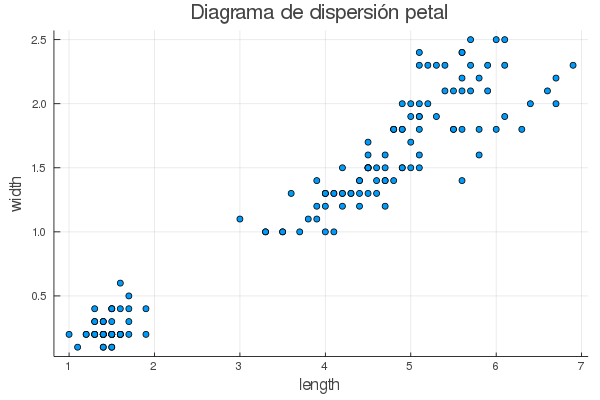

In [8]:
@df data scatter(:PetalLength,:PetalWidth,title = "Diagrama de dispersión petal",xlabel="length",ylabel="width",legend = false)

Ahora podemos colorear cada tipo de flor según su tipo y ver como se disponen en el gráfico:

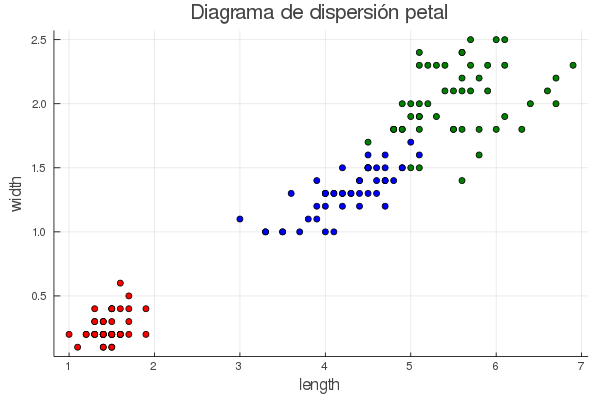

In [9]:
@df data scatter(:PetalLength[1:50],:PetalWidth[1:50],color=:red,title = "Diagrama de dispersión petal",xlabel="length",ylabel="width",legend = false)
@df data scatter!(:PetalLength[51:100],:PetalWidth[51:100],color=:blue,title = "Diagrama de dispersión petal",xlabel="length",ylabel="width",legend = false)
@df data scatter!(:PetalLength[101:150],:PetalWidth[101:150],color=:green,title = "Diagrama de dispersión petal",xlabel="length",ylabel="width",legend = false)

Que nos muestra el mismo gráfico, pero con cada tipo de flor coloreada.

Y nos confirma de modo visual que es una muy buena candidata para el clasificador.

Vamos a repetir el proceso con la característica Sepal a ver que ocurre, empezamos calculando la correlación entre su longitud y su anchura:

In [10]:
cor(data.SepalLength,data.SepalWidth)

-0.11756978413300206

Obtenemos: -0.11756978413300206, lo que nos indica una correlación casi inexistente.

Vamos a confirmarlo visualmente:

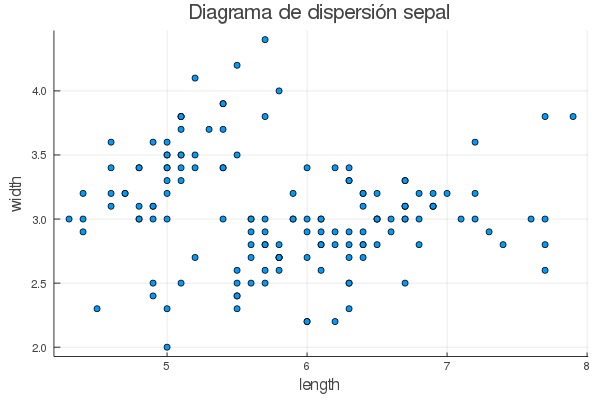

In [11]:
@df data scatter(:SepalLength,:SepalWidth,title = "Diagrama de dispersión sepal",xlabel="length",ylabel="width",legend = false)

Que ya muestra la falta de un patrón de correlación, si además lo representamos con cada tipo de flor con su color obtenemos:

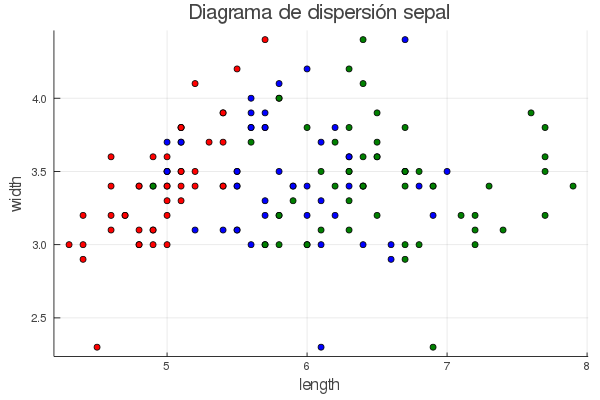

In [12]:
@df data scatter(:SepalLength[1:50],:SepalWidth[1:50],color=:red,title = "Diagrama de dispersión sepal",xlabel="length",ylabel="width",legend = false)  
@df data scatter!(:SepalLength[51:100],:SepalWidth[1:50],color=:blue,title = "Diagrama de dispersión sepal",xlabel="length",ylabel="width",legend = false)  
@df data scatter!(:SepalLength[101:150],:SepalWidth[1:50],color=:green,title = "Diagrama de dispersión sepal",xlabel="length",ylabel="width",legend = false)  

Lo que nos confirma que la característica Sepal no es una buena candidata a priori para nuestro clasificador.

Podemos seguir indagando un poco más en los datos y repetir el mismo estudio que hemos realizado en todo el conjunto de datos, pero considerando cada tipo de planta por separado y ver si confirmamos nuestras primeras deducciones sobre las variables a utilizar para nuestro clasificador.

	Empezamos por el tipo setosa, vamos a obtener un Dataframe que sólo contenga las plantas de este tipo, para ello vamos a usar el paquete Query.jl (https://www.queryverse.org/Query.jl/stable/), ejecutamos el siguiente código:

In [13]:
data_setosa = @from i in data begin
        @where i.Species == "setosa"
        @select i
        @collect DataFrame
    end

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


Y ya tenemos nuestro DataFrame, data_setosa que contiene 50 filas de datos.

Comprobamos la correlación de la característica Petal:

In [16]:
cor(data_setosa.PetalLength,data_setosa.PetalWidth)

0.3316300408041188

y obtenemos el siguiente resultado: 0.3316300408041188, es decir la correlación para el tipo setosa es aproximadamente de 0,33 mientras que para el conjunto de datos es de 0,96, quizá esta característica no nos sirva para usar de manera global, tendremos que tener esto en cuenta a la hora de diseñar nuestro clasificador.

Como antes comprobémoslo de forma visual:

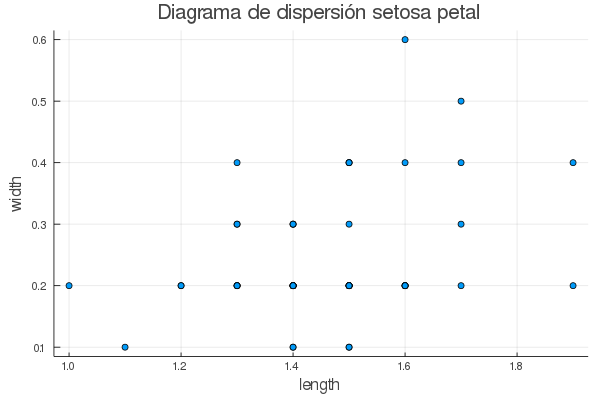

In [17]:
@df data_setosa scatter(:PetalLength,:PetalWidth,title = "Diagrama de dispersión setosa petal",xlabel="length",ylabel="width",legend = false)

Que como podemos apreciar los datos están dispersos en el gráfico.

Veamos que ocurre con la característica Sepal, que a priori no es candidata si consideramos el conjunto total de los datos.

In [18]:
cor(data_setosa.SepalLength,data_setosa.SepalWidth)

0.7425466856651596

Obtenemos una correlación de  0.7425466856651596, frente al -0,11 del conjunto, 
quizás esta característica si que nos será útil, al menos para aplicar en este tipo de flores.
Lo vemos gráficamente: 


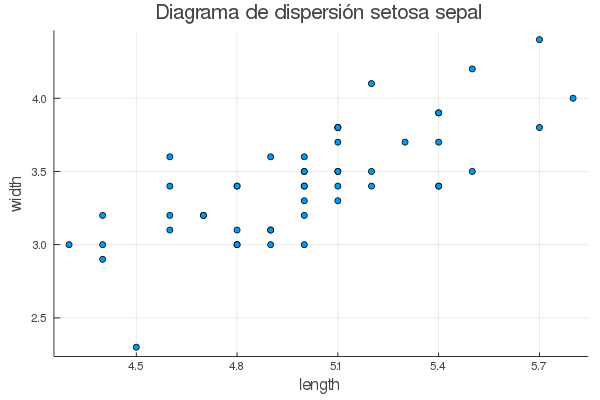

In [19]:
@df data_setosa scatter(:SepalLength,:SepalWidth,title = "Diagrama de dispersión setosa sepal",xlabel="length",ylabel="width",legend = false)

El gráfico obtenido confirma nuestras sospechas de correlación para el tipo setosa.

Veamos a continuación que ocurre con el tipo versicolor, obtenemos el Dataframe, data_versicolor:

In [20]:
data_versicolor = @from i in data begin
        @where i.Species == "versicolor"
        @select i
        @collect DataFrame
    end

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,7.0,3.2,4.7,1.4,versicolor
2,6.4,3.2,4.5,1.5,versicolor
3,6.9,3.1,4.9,1.5,versicolor
4,5.5,2.3,4.0,1.3,versicolor
5,6.5,2.8,4.6,1.5,versicolor
6,5.7,2.8,4.5,1.3,versicolor
7,6.3,3.3,4.7,1.6,versicolor
8,4.9,2.4,3.3,1.0,versicolor
9,6.6,2.9,4.6,1.3,versicolor


Ya tenemos los 50 datos correspondientes al tipo versicolor, veamos que ocurre con la característica Petal:

In [21]:
cor(data_versicolor.PetalLength,data_versicolor.PetalWidth)

0.7866680885228168

Y obtenemos una correlación de: 0.7866680885228168, frente al 0,96 del conjunto total, esto nos indica que para el tipo versicolor si que es una característica a tener en cuenta. Veámoslo gráficamente:

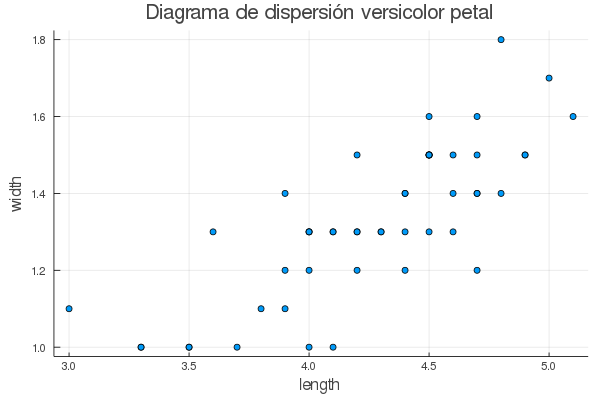

In [22]:
@df data_versicolor scatter(:PetalLength,:PetalWidth,title = "Diagrama de dispersión versicolor petal",xlabel="length",ylabel="width",legend = false)

Veamos ahora que ocurre con la característica Sepal:

In [23]:
cor(data_versicolor.SepalLength,data_versicolor.SepalWidth)

0.5259107172828247

Y obtenemos como resultado: 0.5259107172828247, mucho mejor de lo esperado ya que el global es de -0,11, luego para el tipo versicolor si hay correlación, aunque es mejor la obtenida para la característica Petal. Veamos gráficamente la variable Sepal:

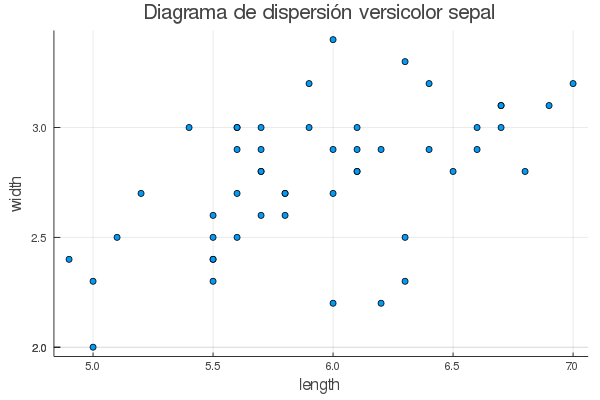

In [24]:
@df data_versicolor scatter(:SepalLength,:SepalWidth,title = "Diagrama de dispersión versicolor sepal",xlabel="length",ylabel="width",legend = false)

In [25]:
data_virginica = @from i in data begin
        @where i.Species == "virginica"
        @select i
        @collect DataFrame
    end

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,6.3,3.3,6.0,2.5,virginica
2,5.8,2.7,5.1,1.9,virginica
3,7.1,3.0,5.9,2.1,virginica
4,6.3,2.9,5.6,1.8,virginica
5,6.5,3.0,5.8,2.2,virginica
6,7.6,3.0,6.6,2.1,virginica
7,4.9,2.5,4.5,1.7,virginica
8,7.3,2.9,6.3,1.8,virginica
9,6.7,2.5,5.8,1.8,virginica


Obtenemos los 50 datos relativos al tipo virginica, veamos que ocurre con la característica Petal:

In [26]:
cor(data_virginica.PetalLength,data_virginica.PetalWidth)

0.32210821590031824

Y obtenemos el siguiente resultado: 0.32210821590031824, de nuevo muy lejos del obtenido de todo el conjunto de datos que es 0.96, otra sorpresa, quizás esta característica tampoco sea la mas adecuada para el tipo virginica. Veámoslo gráficamente:



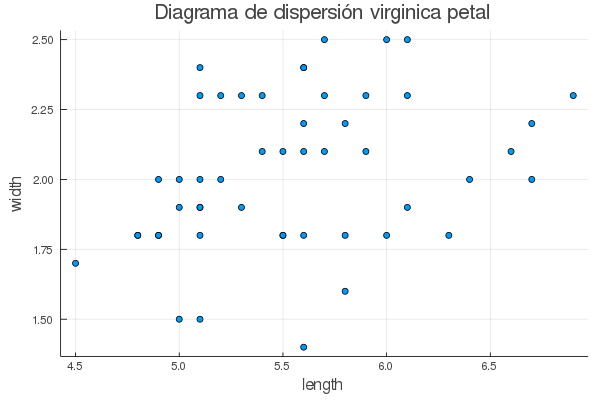

In [27]:
@df data_virginica scatter(:PetalLength,:PetalWidth,title = "Diagrama de dispersión virginica petal",xlabel="length",ylabel="width",legend = false)

Como podemos ver en el gráfico los puntos no siguen ningún patrón. Veamos que ocurre con la característica Sepal:

In [28]:
cor(data_virginica.SepalLength,data_virginica.SepalWidth)

0.4572278163941131

Que nos da un valor de 0.4572278163941131, frente al -0,11 del conjunto, no es que sea muy alto, pero si mejor que con la característica Petal. Veamos el gráfico:

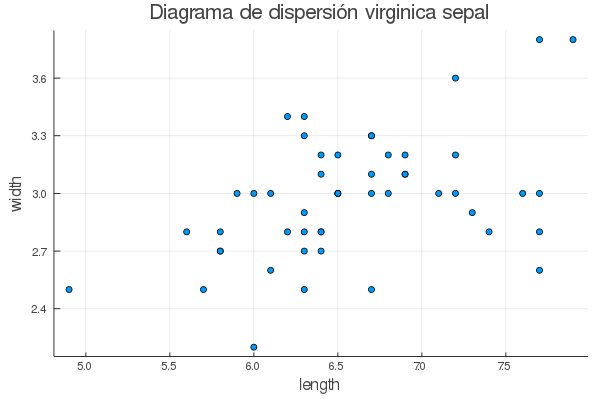

In [29]:
@df data_virginica scatter(:SepalLength,:SepalWidth,title = "Diagrama de dispersión virginica sepal",xlabel="length",ylabel="width",legend = false)

Una vez realizado este primer estudio de cada característica podemos ir realizando los mismos paso, pero combinado las dos característica, para que este blog no sea interminable, vamos a ver a que conclusiones hemos llegado tras todas las combinaciones. 

Vamos a utilizar los tres siguientes gráficos de nubes de puntos que donde los tres conjuntos están mejor diferenciados, el que ya vimos de PetalLength-PetalWidht

El que combina SepalLength-PetalLength

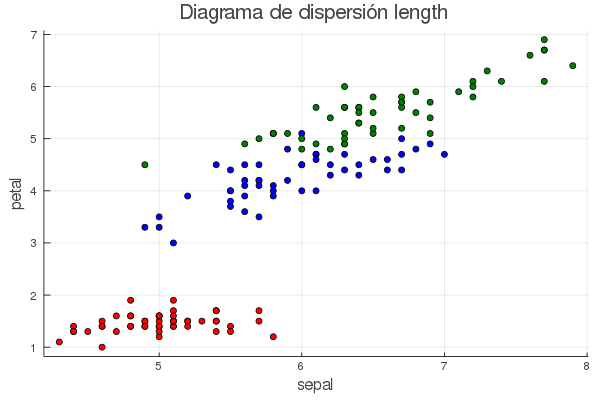

In [30]:
@df data scatter(:SepalLength[1:50],:PetalLength[1:50],color=:red,title = "Diagrama de dispersión length",xlabel="sepal",ylabel="petal",legend = false)
@df data scatter!(:SepalLength[51:100],:PetalLength[51:100],color=:blue,title = "Diagrama de dispersión length",xlabel="sepal",ylabel="petal",legend = false)
@df data scatter!(:SepalLength[101:150],:PetalLength[101:150],color=:green,title = "Diagrama de dispersión length",xlabel="sepal",ylabel="petal",legend = false)

Y por último el que combina SepalWidth-PetalWidth:

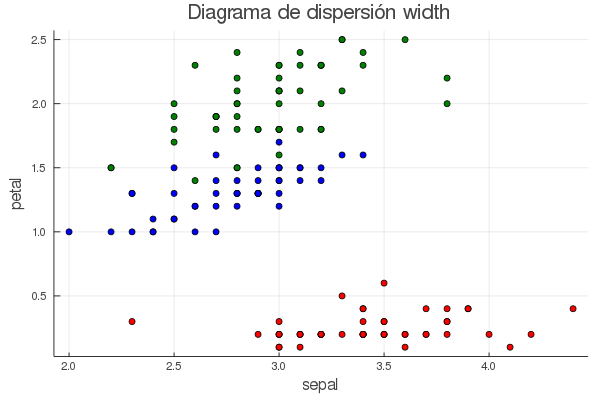

In [31]:
@df data scatter(:SepalWidth[1:50],:PetalWidth[1:50],color=:red,title = "Diagrama de dispersión width",xlabel="sepal",ylabel="petal",legend = false)
@df data scatter!(:SepalWidth[51:100],:PetalWidth[51:100],color=:blue,title = "Diagrama de dispersión width",xlabel="sepal",ylabel="petal",legend = false)
@df data scatter!(:SepalWidth[101:150],:PetalWidth[101:150],color=:green,title = "Diagrama de dispersión width",xlabel="sepal",ylabel="petal",legend = false)


Basándonos en estos tres diagramas vamos a implementar el algoritmo de K-medias para cada uno de ellos, y a continuación implementaremos un sistema de votación entre los tres, de forma que si dos o más clasifican del mismo tipo daremos por correcta la respuesta.

Lo primero es calcular el centro de cada nube de puntos de los tres diagramas:

In [33]:
setosa_xpl=mean(data.PetalLength[1:50])
setosa_ypw=mean(data.PetalWidth[1:50])
versicolor_xpl=mean(data.PetalLength[51:100])
versicolor_ypw=mean(data.PetalWidth[51:100])
virginica_xpl=mean(data.PetalLength[101:150])
virginica_ypw=mean(data.PetalWidth[101:150])

setosa_xsl=mean(data.SepalLength[1:50])
setosa_ypl=mean(data.PetalLength[1:50])
versicolor_xsl=mean(data.SepalLength[51:100])
versicolor_ypl=mean(data.PetalLength[51:100])
virginica_xsl=mean(data.SepalLength[101:150])
virginica_ypl=mean(data.PetalLength[101:150])

setosa_xsw=mean(data.SepalWidth[1:50])
setosa_ypw=mean(data.PetalWidth[1:50])
versicolor_xsw=mean(data.SepalWidth[51:100])
versicolor_ypw=mean(data.PetalWidth[51:100])
virginica_xsw=mean(data.SepalWidth[101:150])
virginica_ypw=mean(data.PetalWidth[101:150])

centro_setosa_plw=[setosa_xpl setosa_ypw]
centro_versicolor_plw=[versicolor_xpl versicolor_ypw]
centro_virginica_plw=[virginica_xpl virginica_ypw]
centro_setosa_spl=[setosa_xsl setosa_ypl]
centro_versicolor_spl=[versicolor_xsl versicolor_ypl]
centro_virginica_spl=[virginica_xsl virginica_ypl]
centro_setosa_spw=[setosa_xsw setosa_ypw]
centro_versicolor_spw=[versicolor_xsw versicolor_ypw]
centro_virginica_spw=[virginica_xsw virginica_ypw]


1×2 Array{Float64,2}:
 2.974  2.026

Implementamos las funciones de clasificación para cada nube:

In [34]:
function dist_nube_plw(planta)
    clase=0
    dist=[norm(planta-centro_setosa_plw) norm(planta-centro_versicolor_plw) norm(planta-centro_virginica_plw)]
    for i in eachindex(dist) 
      if dist[i]==minimum(dist) clase=i  end
  end
  return clase
end
function dist_nube_spl(planta)
    clase=0
    dist=[norm(planta-centro_setosa_spl) norm(planta-centro_versicolor_spl) norm(planta-centro_virginica_spl)]
    for i in eachindex(dist) 
      if dist[i]==minimum(dist) clase=i  end
  end
  return clase
end
function dist_nube_spw(planta)
    clase=0
    dist=[norm(planta-centro_setosa_spw) norm(planta-centro_versicolor_spw) norm(planta-centro_virginica_spw)]
    for i in eachindex(dist) 
      if dist[i]==minimum(dist) clase=i  end
  end
  return clase
end


dist_nube_spw (generic function with 1 method)

Implementamos el clasificador:

In [35]:
function clasificador_Iris(dict)
    if haskey(dict,1) && dict[1]>1 return "setosa"
    end
    if haskey(dict,2) && dict[2]>1 return "versicolor"
    end
    if haskey(dict,3) && dict[3]>1 return "virginica"
    end
    return "indefinido"
end

clasificador_Iris (generic function with 1 method)

Por último, vamos a implementar un simulador que recorra nuestro conjunto de datos y clasifique cada una de las plantas y nos indique los fallos que tiene para poder comprobar la fiabilidad de nuestro clasificador, al menos sobre el conjunto de datos de que disponemos.

In [40]:
function simulacion()
    cont=0
    for i in 1 : 150
        planta1=[data.PetalLength[i] data.PetalWidth[i]]
        clase_plw=dist_nube_plw(planta1)
        planta1=[data.SepalLength[i] data.PetalLength[i]]
        clase_spl=dist_nube_spl(planta1)
        planta1=[data.SepalWidth[i] data.PetalWidth[i]]
        clase_spw=dist_nube_spw(planta1)
        tipo=[clase_plw ,clase_spl, clase_spw]
        dict_tipo=countmap(tipo)
        if( data.Species[i] ==clasificador_Iris(dict_tipo))
            cont+=1
        else
            @show "fallo " i  data.Species[i]  clasificador_Iris(dict_tipo)
        end
    end
    return cont
end

simulacion (generic function with 1 method)

Ya estamos en disposición de probar nuestro clasificador solo tenemos que ejecutarlo:

In [41]:
aciertos=simulacion()

"fallo " = "fallo "
i = 78
data.Species[i] = CategoricalArrays.CategoricalValue{String,UInt8} "versicolor"
clasificador_Iris(dict_tipo) = "virginica"
"fallo " = "fallo "
i = 84
data.Species[i] = CategoricalArrays.CategoricalValue{String,UInt8} "versicolor"
clasificador_Iris(dict_tipo) = "virginica"
"fallo " = "fallo "
i = 107
data.Species[i] = CategoricalArrays.CategoricalValue{String,UInt8} "virginica"
clasificador_Iris(dict_tipo) = "versicolor"
"fallo " = "fallo "
i = 120
data.Species[i] = CategoricalArrays.CategoricalValue{String,UInt8} "virginica"
clasificador_Iris(dict_tipo) = "versicolor"
"fallo " = "fallo "
i = 127
data.Species[i] = CategoricalArrays.CategoricalValue{String,UInt8} "virginica"
clasificador_Iris(dict_tipo) = "versicolor"
"fallo " = "fallo "
i = 139
data.Species[i] = CategoricalArrays.CategoricalValue{String,UInt8} "virginica"
clasificador_Iris(dict_tipo) = "versicolor"


144

Como podemos ver, de los 150 ejemplos de nuestro conjunto de datos, obtenemos 144 bien clasificados es decir un 96% de fiabilidad en las predicciones.